In [1]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/mkline3/ThinkStats2/master/StudentsPerformance.csv'

students = pd.read_csv(url)
avg = []
for i in range(len(students)):
  average = (students['math score'][i] + students['reading score'][i] + students['writing score'][i]) / 3
  avg.append(round(average,2))
students['average score'] = avg
students.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


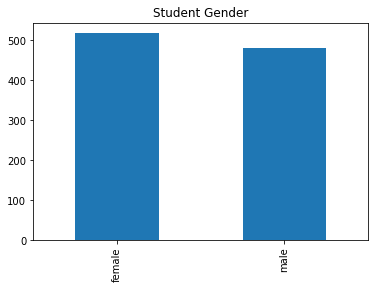

In [3]:
students['gender'].value_counts().plot(kind = "bar", title = 'Student Gender')

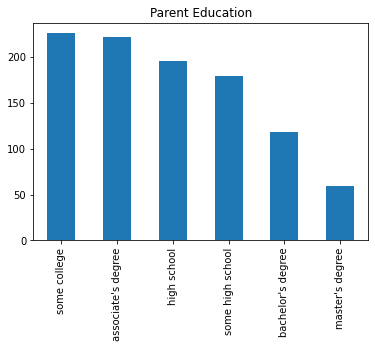

In [4]:
students['parental level of education'].value_counts().plot(kind = "bar", title = 'Parent Education')

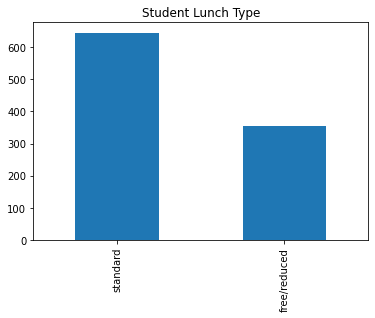

In [5]:
students['lunch'].value_counts().plot(kind = "bar", title = 'Student Lunch Type')

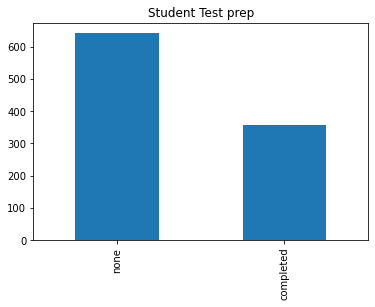

In [6]:
students['test preparation course'].value_counts().plot(kind = "bar", title = 'Student Test prep')

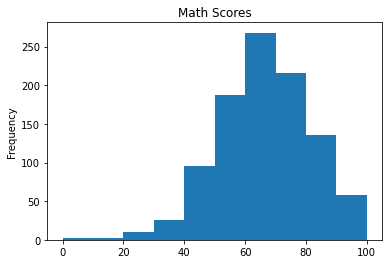

In [7]:
students['math score'].plot(kind = "hist", title = 'Math Scores')

In [64]:
print(students['math score'].mean())
print(students['math score'].median())
print(students['math score'].mode())
print(students['math score'].std())

66.089
66.0
0    65
dtype: int64
15.163080096009468


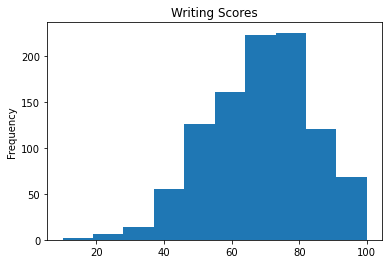

In [8]:
students['writing score'].plot(kind = "hist", title = 'Writing Scores')

In [67]:
print(students['writing score'].mean())
print(students['writing score'].median())
print(students['writing score'].mode())
print(students['writing score'].std())

68.054
69.0
0    74
dtype: int64
15.195657010869642


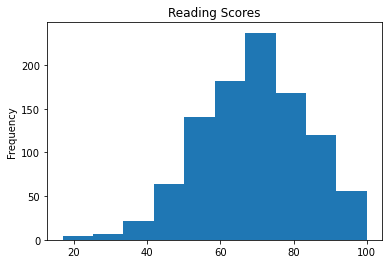

In [9]:
students['reading score'].plot(kind = "hist", title = 'Reading Scores')

In [66]:
print(students['reading score'].mean())
print(students['reading score'].median())
print(students['reading score'].mode())
print(students['reading score'].std())

69.169
70.0
0    72
dtype: int64
14.60019193725222


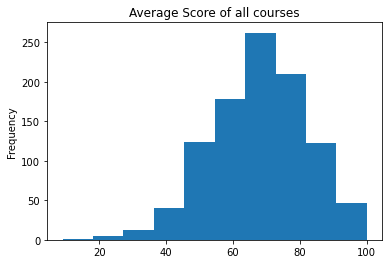

In [10]:
students['average score'].plot(kind = "hist", title = 'Average Score of all courses')

In [65]:
print(students['average score'].mean())
print(students['average score'].median())
print(students['average score'].mode())
print(students['average score'].std())

67.77058000000002
68.33
0    68.0
dtype: float64
14.257310804460104


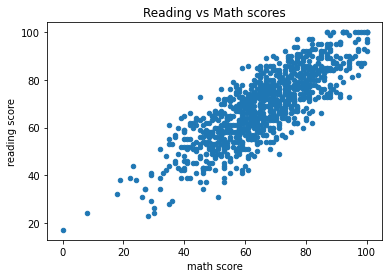

In [11]:
students.plot(kind='scatter', x='math score', y='reading score', title = "Reading vs Math scores")

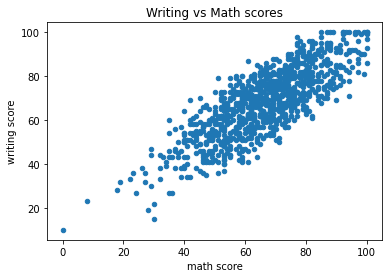

In [55]:
students.plot(kind='scatter', x='math score', y='writing score', title = "Writing vs Math scores")

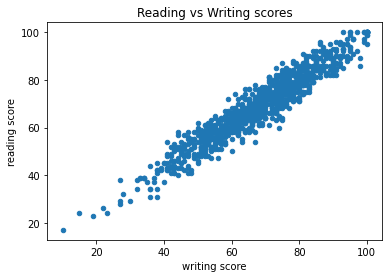

In [13]:
students.plot(kind='scatter', x='writing score', y='reading score', title = "Reading vs Writing scores")

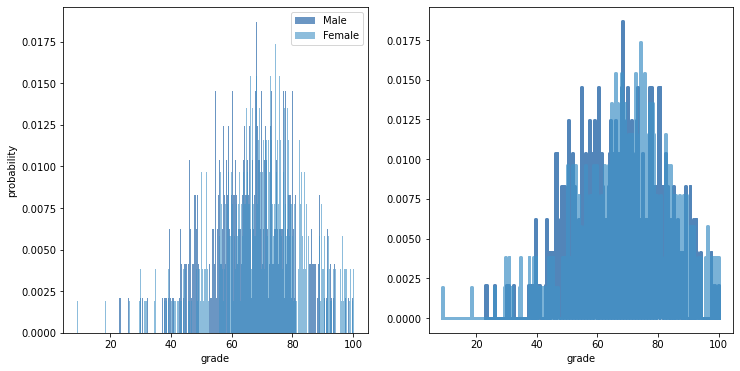

<Figure size 576x432 with 0 Axes>

In [22]:
import thinkstats2
import thinkplot 
boy_df = students[students['gender'] == 'male']

girls_df = students[students['gender'] == 'female']

boys = thinkstats2.Pmf(boy_df['average score'])

girls = thinkstats2.Pmf(girls_df['average score'])

thinkplot.PrePlot(2, cols=2) 
thinkplot.Hist(boys, align='right', label='Male') 
thinkplot.Hist(girls, align='left', label='Female')
thinkplot.Config(xlabel='grade',ylabel='probability')
thinkplot.PrePlot(2) 
thinkplot.SubPlot(2) 
thinkplot.Pmfs([boys, girls])
thinkplot.Show(xlabel='grade')

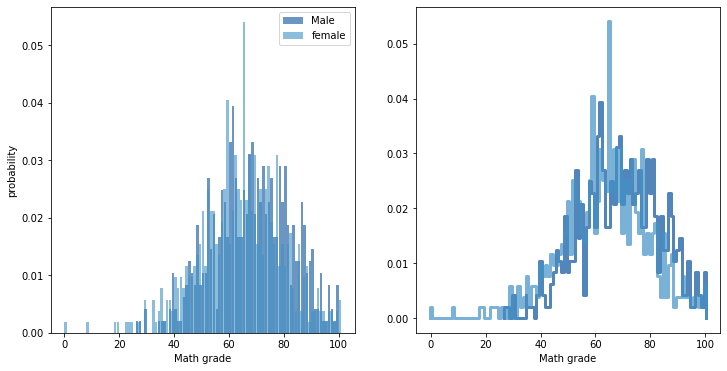

<Figure size 576x432 with 0 Axes>

In [23]:
boys = thinkstats2.Pmf(boy_df['math score'])

girls = thinkstats2.Pmf(girls_df['math score'])

thinkplot.PrePlot(2, cols=2) 
thinkplot.Hist(boys, align='right', label='Male') 
thinkplot.Hist(girls, align='left', label='female')
thinkplot.Config(xlabel='Math grade',ylabel='probability')
thinkplot.PrePlot(2) 
thinkplot.SubPlot(2) 
thinkplot.Pmfs([boys, girls])
thinkplot.Show(xlabel='Math grade')

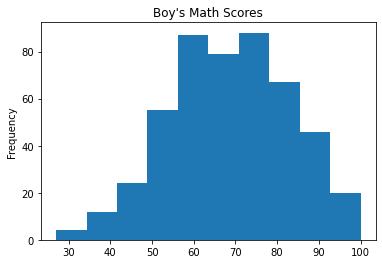

In [58]:
boy_df['math score'].plot(kind = "hist", title = "Boy's Math Scores")

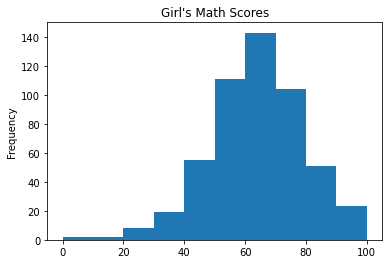

In [59]:
girls_df['math score'].plot(kind = "hist", title = "Girl's Math Scores")

In [68]:
print(boy_df['math score'].mean())
print(boy_df['math score'].median())
print(boy_df['math score'].mode())
print(boy_df['math score'].std())

print(girls_df['math score'].mean())
print(girls_df['math score'].median())
print(girls_df['math score'].mode())
print(girls_df['math score'].std())

68.72821576763485
69.0
0    62
dtype: int64
14.35627719636238
63.633204633204635
65.0
0    65
dtype: int64
15.49145324233953


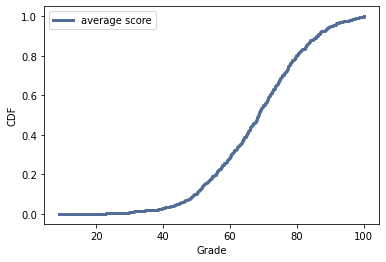

<Figure size 576x432 with 0 Axes>

In [24]:
cdf = thinkstats2.Cdf(students['average score'], label='average score')
thinkplot.Cdf(cdf) 
thinkplot.Show(xlabel='Grade', ylabel='CDF')

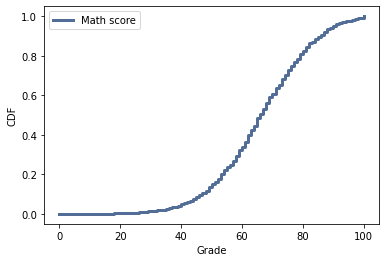

<Figure size 576x432 with 0 Axes>

In [27]:
cdf = thinkstats2.Cdf(students['math score'], label='Math score')
thinkplot.Cdf(cdf) 
thinkplot.Show(xlabel='Grade', ylabel='CDF')

In [33]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df['average score'])

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper) ##had to convert to int to prevent error due to current version of numpy
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

<ipython-input-33-08abd2ac6b36>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
<ipython-input-33-08abd2ac6b36>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


mean 1.8198909373918783
std 0.09041652368145844
median 1.8305036750288788
skewness -1.2489489030879874
pearson skewness -0.35212825725525004
cdf[mean] 0


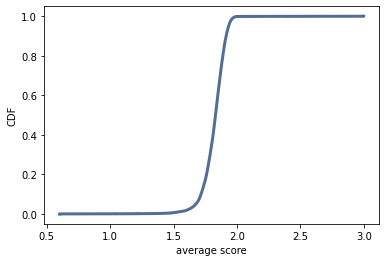

<Figure size 576x432 with 0 Axes>

In [35]:
import density
sample = InterpolateSample(students, log_upper=0.6)
s = np.power(10, sample)
mean, median = density.Summarize(sample)
cdf = thinkstats2.Cdf(s)
print('cdf[mean]', cdf[mean])

log_cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='average score',
               ylabel='CDF')

In [47]:
#code used from chapter 9 changed to fit needs
import hypothesis
def RunTests(student, iters=3000):
    """Runs the tests from Chapter 9 with a subset of the data.

    live: DataFrame
    iters: how many iterations to run
    """
    n = len(student)
    males = student[student['gender'] == 'male']
    females = student[student['gender'] == 'female']

    # compare average scores
    data = males['average score'].values, females['average score'].values
    ht = hypothesis.DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)
    
    # compare math scores
    data = males['math score'].values, females['math score'].values
    ht = hypothesis.DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)



    print('%d\t%0.2f\t%0.2f' % (n, p1, p2))
    
RunTests(students)

1000	0.00	0.00


In [53]:
import statsmodels.formula.api as smf
st_df = students.rename(columns={'test preparation course': 'testPrep', 'parental level of education': 'pEdu', 'average score': 'avg', 'math score': 'math'}) 
model = smf.ols('avg ~ gender + lunch + testPrep + pEdu', data=st_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     34.98
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.63e-49
Time:                        17:37:19   Log-Likelihood:                -3951.3
No. Observations:                1000   AIC:                             7921.
Df Residuals:                     991   BIC:                             7965.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    70.3042      1.195     58.833      0.000      67.959      72.649
gender[T.male]               -3.6460      0.802     -4.549      0.000      -5.219      -2.073
lunch[T.standard]             8.9821      0.836     10.742      0.000       7.341      10.623
testPrep[T.none]             -7.7082      0.838     -9.199      0.000      -9.353      -6.064
pEdu[T.bachelor's degree]     2.3897      1.440      1.659      0.097      -0.437       5.216
pEdu[T.high school]          -5.5779      1.241     -4.493      0.000      -8.014      -3.142
pEdu[T.master's degree]       4.4827      1.854      2.418      0.016       0.845       8.120
pEdu[T.some college]         -0.8461      1.195     -0.708      0.479      -3.191       1.498
pEdu[T.some high school]     -4.9329      1.271     -3.881      0.000      -7.427      -2.439
==============================================================================
Omnibus:                       10.833   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.079
Skew:                          -0.251   Prob(JB):                      0.00393
Kurtosis:                       2.885   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""